In [1]:
DATAPATH = '../data/'
XFERPATH = '~/downloads/'  # To transfer files from Google Colab
FNAME = 'embeds.csv'

In [2]:
frompath = XFERPATH + FNAME
topath = DATAPATH + FNAME
!cp $frompath $topath

In [97]:
import keras
import pandas as pd
import gender_guesser.detector as gender
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(DATAPATH+'embeds.csv',index_col=0)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,names
1045196569056669704,0.058569,-0.065579,-0.091680,-0.029350,-0.082061,0.040025,0.011938,0.049602,0.014164,-0.038351,...,-0.030435,0.039811,-0.001934,-0.033885,-0.027129,0.032534,-0.016910,-0.041840,-0.066517,Amanda ❤💙
774717684009369600,-0.038947,-0.000198,-0.060618,-0.005743,-0.078363,0.021608,0.083429,0.063364,0.059811,-0.079157,...,-0.029205,0.069821,0.017588,0.040863,-0.030275,0.047834,-0.013850,-0.064477,0.024759,Yvonne Conte
334381911,0.088421,-0.009570,-0.085473,0.010273,-0.093392,0.077757,-0.025262,0.042900,-0.025423,-0.007675,...,-0.002437,0.025510,-0.026548,-0.003747,-0.054380,0.070094,0.006940,-0.088164,0.024163,Sunshine
17491245,-0.021786,-0.024920,-0.048070,-0.063250,-0.059432,0.034641,0.031758,0.079691,0.006389,0.064993,...,-0.024126,0.006456,-0.019221,-0.044635,-0.073153,0.037682,-0.001223,-0.040404,-0.029900,Dina
360577036,-0.045635,-0.049451,-0.002246,-0.047154,0.011612,0.001651,0.010348,-0.022888,0.085357,0.056037,...,0.014130,-0.010233,0.003693,-0.020414,-0.078303,0.045025,-0.025883,-0.042053,-0.068529,Elizabeth Booker


In [4]:
df = df.rename(columns={'names':'name'})
df.head()

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,name
1045196569056669704,0.058569,-0.065579,-0.091680,-0.029350,-0.082061,0.040025,0.011938,0.049602,0.014164,-0.038351,...,-0.030435,0.039811,-0.001934,-0.033885,-0.027129,0.032534,-0.016910,-0.041840,-0.066517,Amanda ❤💙
774717684009369600,-0.038947,-0.000198,-0.060618,-0.005743,-0.078363,0.021608,0.083429,0.063364,0.059811,-0.079157,...,-0.029205,0.069821,0.017588,0.040863,-0.030275,0.047834,-0.013850,-0.064477,0.024759,Yvonne Conte
334381911,0.088421,-0.009570,-0.085473,0.010273,-0.093392,0.077757,-0.025262,0.042900,-0.025423,-0.007675,...,-0.002437,0.025510,-0.026548,-0.003747,-0.054380,0.070094,0.006940,-0.088164,0.024163,Sunshine
17491245,-0.021786,-0.024920,-0.048070,-0.063250,-0.059432,0.034641,0.031758,0.079691,0.006389,0.064993,...,-0.024126,0.006456,-0.019221,-0.044635,-0.073153,0.037682,-0.001223,-0.040404,-0.029900,Dina
360577036,-0.045635,-0.049451,-0.002246,-0.047154,0.011612,0.001651,0.010348,-0.022888,0.085357,0.056037,...,0.014130,-0.010233,0.003693,-0.020414,-0.078303,0.045025,-0.025883,-0.042053,-0.068529,Elizabeth Booker


In [5]:
d = gender.Detector()
def is_male(name):
    return(d.get_gender(name.split()[0])=='male')

def is_female(name):
    return(d.get_gender(name.split()[0])=='female')

In [6]:
df['male'] = df.name.apply(is_male)

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,504,505,506,507,508,509,510,511,name,male
1045196569056669704,0.058569,-0.065579,-0.091680,-0.029350,-0.082061,0.040025,0.011938,0.049602,0.014164,-0.038351,...,0.039811,-0.001934,-0.033885,-0.027129,0.032534,-0.016910,-0.041840,-0.066517,Amanda ❤💙,False
774717684009369600,-0.038947,-0.000198,-0.060618,-0.005743,-0.078363,0.021608,0.083429,0.063364,0.059811,-0.079157,...,0.069821,0.017588,0.040863,-0.030275,0.047834,-0.013850,-0.064477,0.024759,Yvonne Conte,False
334381911,0.088421,-0.009570,-0.085473,0.010273,-0.093392,0.077757,-0.025262,0.042900,-0.025423,-0.007675,...,0.025510,-0.026548,-0.003747,-0.054380,0.070094,0.006940,-0.088164,0.024163,Sunshine,False
17491245,-0.021786,-0.024920,-0.048070,-0.063250,-0.059432,0.034641,0.031758,0.079691,0.006389,0.064993,...,0.006456,-0.019221,-0.044635,-0.073153,0.037682,-0.001223,-0.040404,-0.029900,Dina,False
360577036,-0.045635,-0.049451,-0.002246,-0.047154,0.011612,0.001651,0.010348,-0.022888,0.085357,0.056037,...,-0.010233,0.003693,-0.020414,-0.078303,0.045025,-0.025883,-0.042053,-0.068529,Elizabeth Booker,False


In [8]:
df.shape

(3005, 514)

In [9]:
X = df.drop(['name','male'],axis=1).values
y = 1*df.male.values
q = 512

In [10]:
start1=800
end1=1000
start2=1200
end2=2400
start3=2700
X_train = np.concatenate([X[:start1,:q],X[start2:end2,:q]])
y_train = np.concatenate([y[:start1],y[start2:end2]])
X_valid = np.concatenate([X[start1:end1,:q],X[end2:start3,:q]])
y_valid = np.concatenate([y[start1:end1],y[end2:start3]])
X_test = np.concatenate([X[end1:start2,:q],X[start3:,:q]])
y_test = np.concatenate([y[end1:start2],y[start3:]])

In [11]:
X_train.shape

(2000, 512)

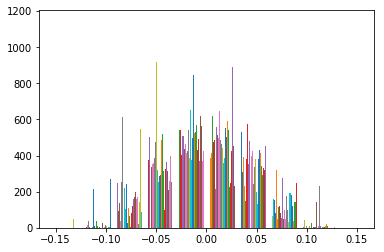

In [12]:
plt.hist(X_train)
plt.show()

In [98]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

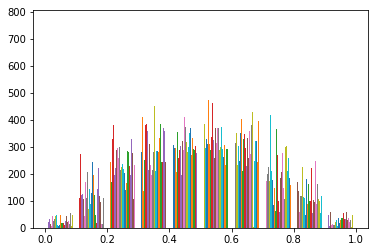

In [108]:
plt.hist(X_train)
plt.show()

In [204]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, activation='relu', input_dim=512))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(.4))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(.8))
model.add(keras.layers.Dense(6, activation='relu',))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [205]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_154 (Dense)            (None, 64)                32832     
_________________________________________________________________
batch_normalization_35 (Batc (None, 64)                256       
_________________________________________________________________
dense_155 (Dense)            (None, 256)               16640     
_________________________________________________________________
dropout_95 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_156 (Dense)            (None, 32)                8224      
_________________________________________________________________
dropout_96 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_157 (Dense)            (None, 6)                 198       
__________

In [206]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [207]:
model.fit(X_train, y_train,
          epochs=20,
          batch_size=64,
          validation_data=[X_valid,y_valid])

Train on 2000 samples, validate on 500 samples
Epoch 1/20
2000/2000 [==============================] - 2s 974us/step - loss: 0.7255 - acc: 0.5205 - val_loss: 0.6789 - val_acc: 0.5980
Epoch 2/20
2000/2000 [==============================] - 0s 72us/step - loss: 0.6859 - acc: 0.5640 - val_loss: 0.6717 - val_acc: 0.6000
Epoch 3/20
2000/2000 [==============================] - 0s 73us/step - loss: 0.6856 - acc: 0.5800 - val_loss: 0.6704 - val_acc: 0.6000
Epoch 4/20
2000/2000 [==============================] - 0s 75us/step - loss: 0.6740 - acc: 0.5890 - val_loss: 0.6671 - val_acc: 0.6000
Epoch 5/20
2000/2000 [==============================] - 0s 73us/step - loss: 0.6696 - acc: 0.5945 - val_loss: 0.6649 - val_acc: 0.6000
Epoch 6/20
2000/2000 [==============================] - 0s 75us/step - loss: 0.6660 - acc: 0.6025 - val_loss: 0.6655 - val_acc: 0.5980
Epoch 7/20
2000/2000 [==============================] - 0s 75us/step - loss: 0.6639 - acc: 0.5910 - val_loss: 0.6593 - val_acc: 0.6000
Epoch 8

In [208]:
y_train_pred = model.predict(X_train)
f1_score(y_train, y_train_pred>.5)

0.768220617202889

In [209]:
y_pred = model.predict(X_valid)
print( confusion_matrix(y_valid, (y_pred>.5)) )
f1_score(y_valid, y_pred>.5)

[[ 25 175]
 [  8 292]]


0.7614080834419816

In [210]:
y_test_pred = model.predict(X_test)
print( confusion_matrix(y_test, (y_test_pred>.5)) )
f1_score(y_test, y_test_pred>.5)

[[ 15 174]
 [ 11 305]]


0.7672955974842767

In [211]:
accuracy_score(y_test, y_test_pred>.5)

0.6336633663366337

In [212]:
fpr, tpr, _ = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

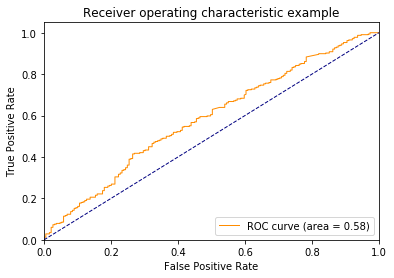

In [213]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()